# Probablistic Programming - Chapter 1

These are notes based on Chapter 1 of [Cam Davidson Pilon's Probabilistic Programming for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers).

* Bayesian world-view interprets probability as measure of believability in an event, as opposed to long-term frequency of events.  Instead, probabilitiy represents confidence in an event - 0 being no confidence (impossible to happen), 1 being full confidence (certain it will happen).
    * Makes more sense for situations that should not be generalized to long-term (eg. presidential elections).
    * Allows for perspective to be baked into calculations, based on prior information and biases available to observer.
* **Prior**: $P(A)$; **posterior**: $P(A|X)$, where $X$ is evidence.
    * Frequentists typically report a summary statistic + error bars on that statistic.  Bayesians report a summary probabilitiy distribution (possibly using corresponding summary statistics).
    * For large $N$, Bayesian and Frequentist methods often approach one another.
* Bayes's Theorem:

$$
P(A|X) = \frac{P(X|A)P(A)}{P(X)}
$$

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Mandatory Coin Flip Example

- The likelihood function for $p$ given $n$ Bernoulli trials where $k$ of them came up heads has Binomial form:

$$
\mathcal{L}(p|k) = P(k|p) = {n\choose k}p^k(1-p)^{n-k}
$$

- Note that the likelihood is not equal to $P(p|k)$ - as [Wikipedia notes](https://en.wikipedia.org/wiki/Likelihood_function), it " describes a hypersurface whose peak, if it exists, represents the combination of model parameter values that maximize the probability of drawing the sample obtained."

- The [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) for this is the Beta function ([proof](https://en.wikipedia.org/wiki/Conjugate_prior#Example)); if we choose this form (and set hyperparameters $\alpha = \beta = 2$), the posterior is

$$
P(p|k) \propto \beta (1 + k, 1 + n - k)
$$

- Will be described further in subsequent chapters.

<IPython.core.display.Javascript object>


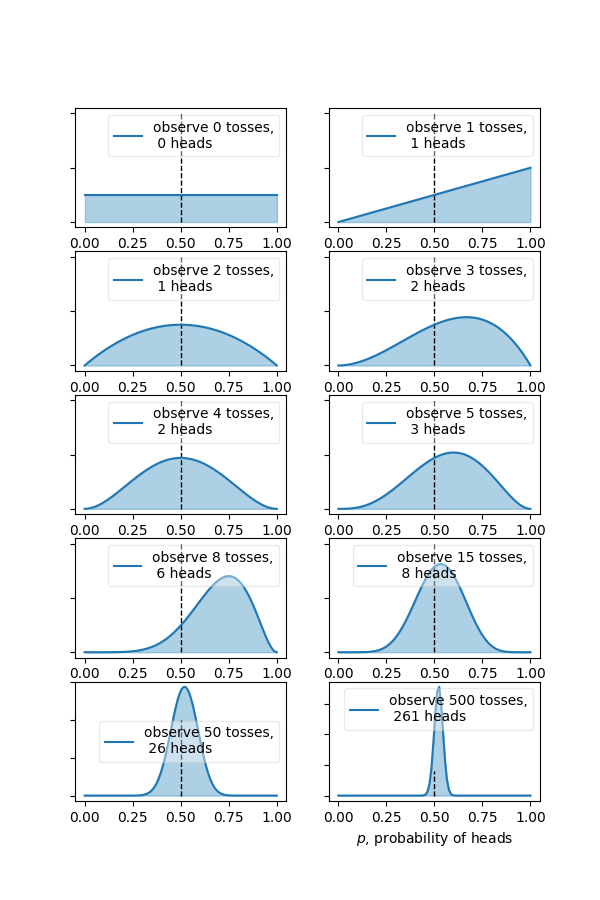

In [4]:
# Generate a bunch 
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(6, 9))

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    # Analytically calculated posterior using binomial conjugate prior.
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4);